In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
# read the data :
df = pd.read_csv('C:\Datasets\covid_19_data.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [5]:
# we want to delete lat,long volumns :
# axis = 1 : do that thing with columns
# inplace=True : reflex the changes on this df
df.drop(['Lat','Long'],axis=1, inplace=True)

In [6]:
# rename the columns :
df.rename(columns= {'Province/State':'Province', 'Country/Region':'Country'},inplace = True)

In [7]:
# this date format is not pandas date format so we must change it ;
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# impute all the missing values :
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [9]:
# group all the records by vountry, date :
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [11]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
5,Afghanistan,2020-01-27,0,0,0
6,Afghanistan,2020-01-28,0,0,0
7,Afghanistan,2020-01-29,0,0,0
8,Afghanistan,2020-01-30,0,0,0
9,Afghanistan,2020-01-31,0,0,0


In [14]:
# devide the countries column from the df, and return only unique values :
countries = df3['Country'].unique()

In [15]:
# how many countries do we have :
len(countries)

166

In [16]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Holy See', 'Hondur

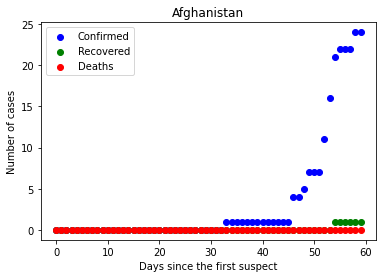

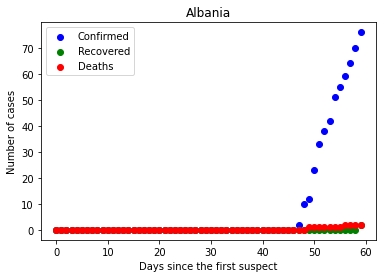

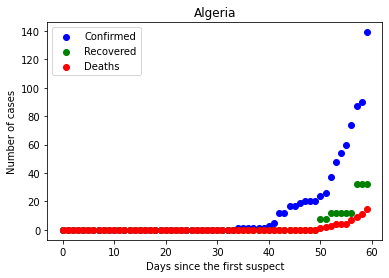

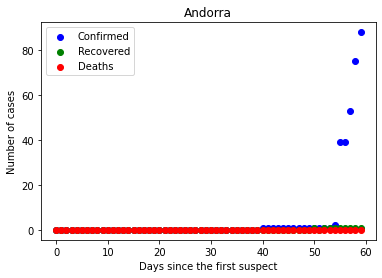

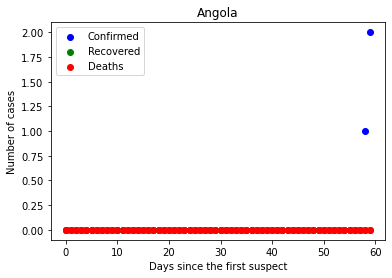

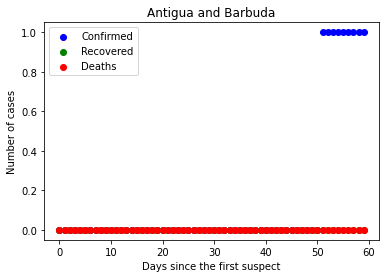

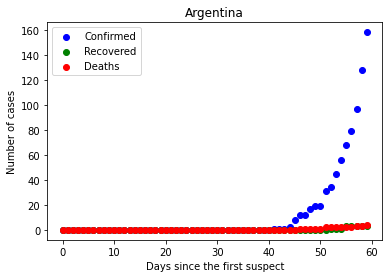

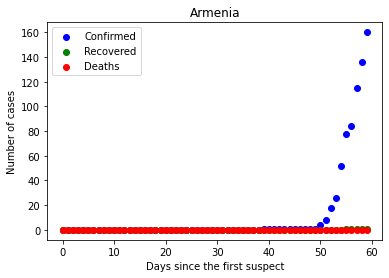

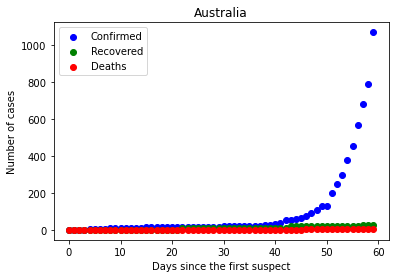

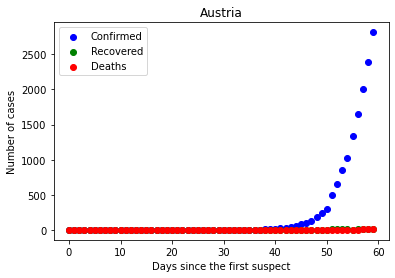

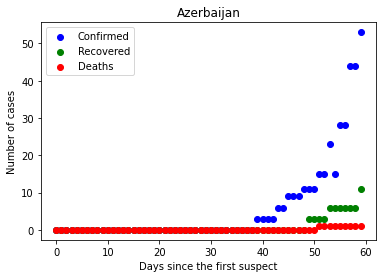

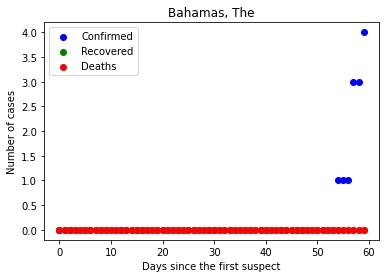

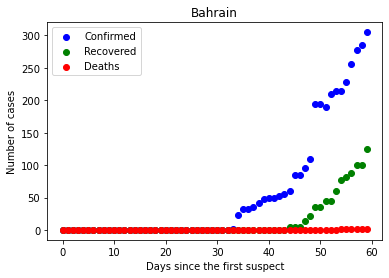

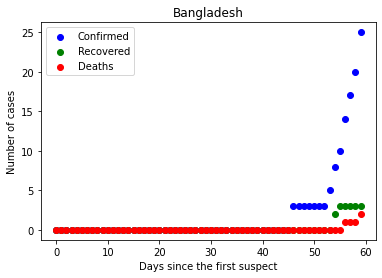

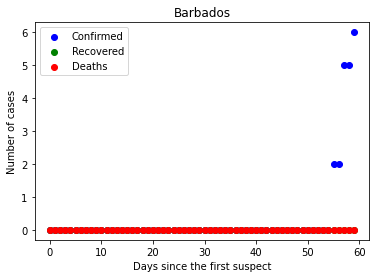

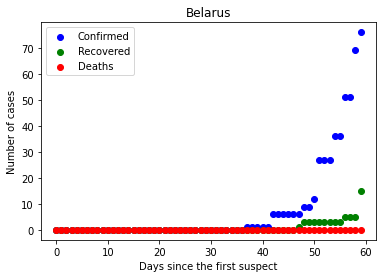

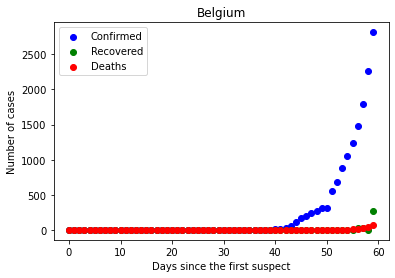

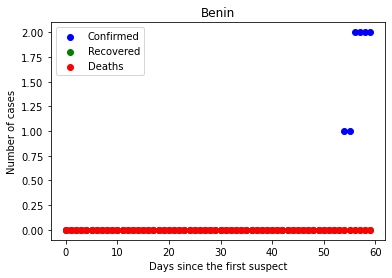

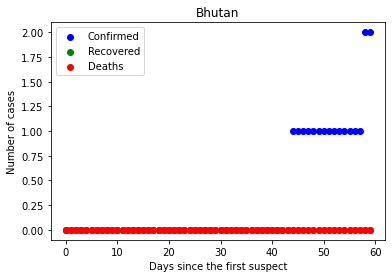

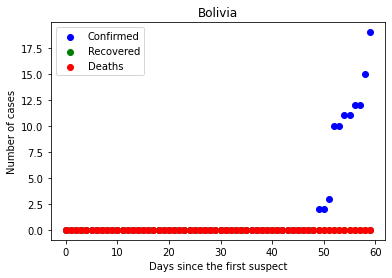

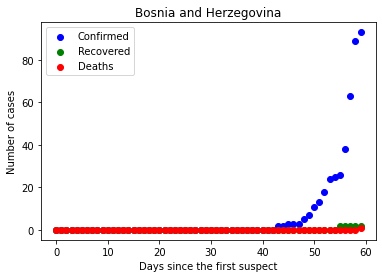

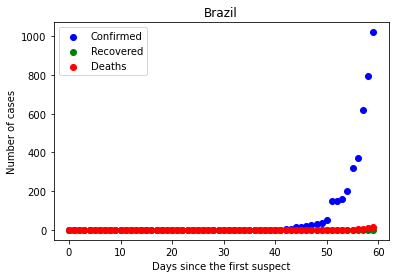

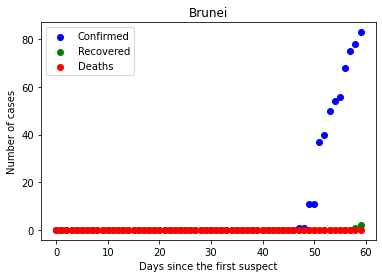

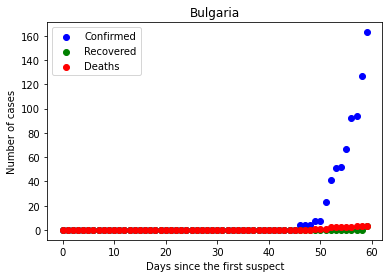

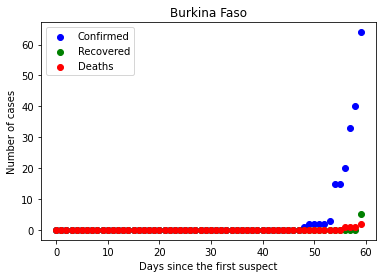

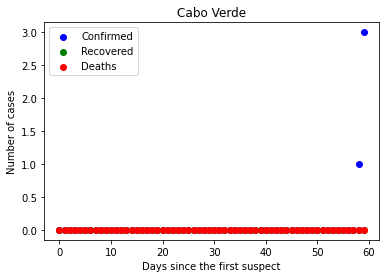

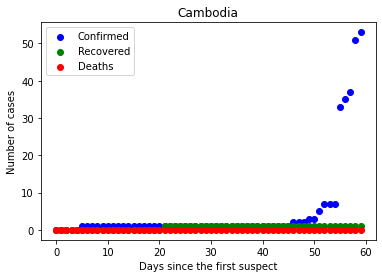

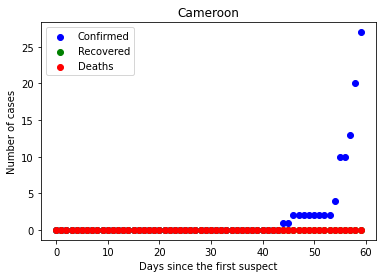

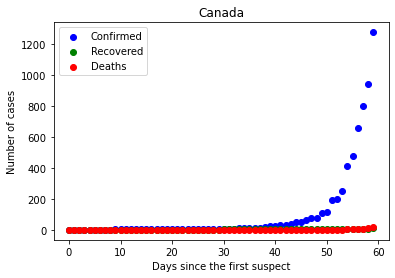

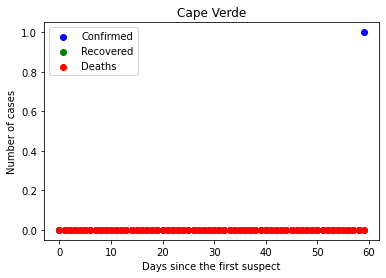

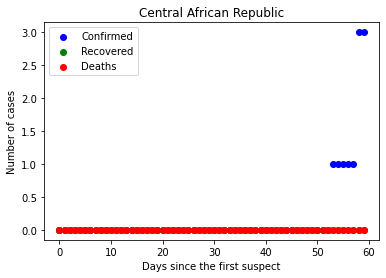

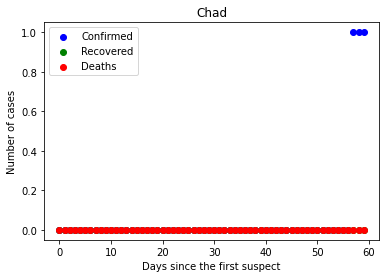

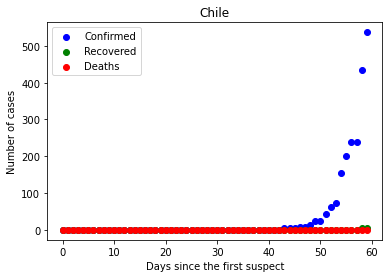

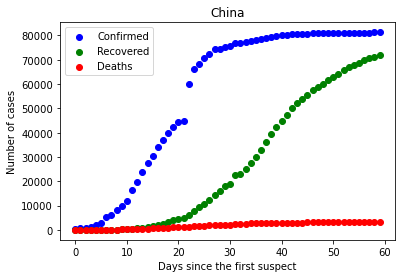

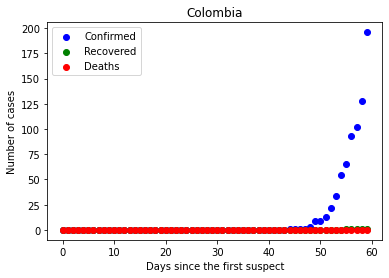

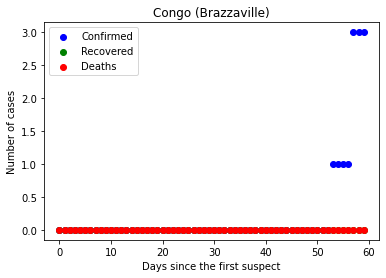

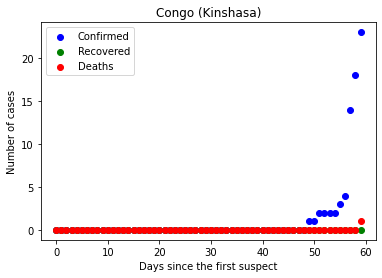

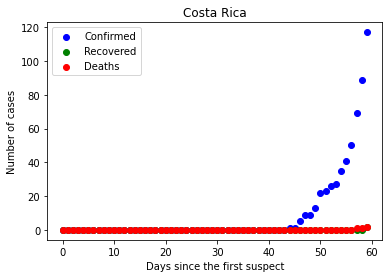

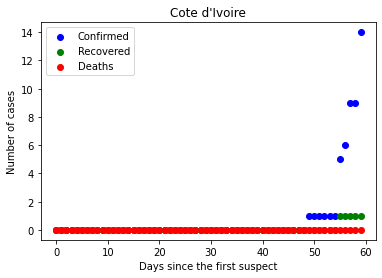

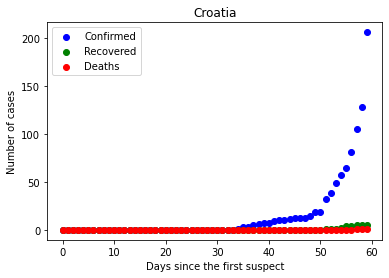

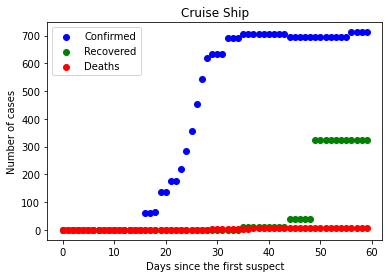

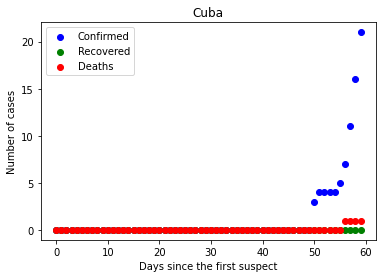

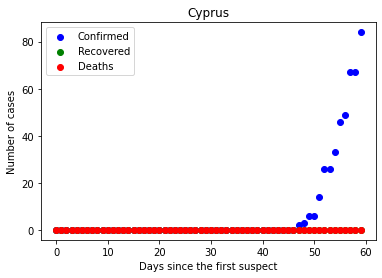

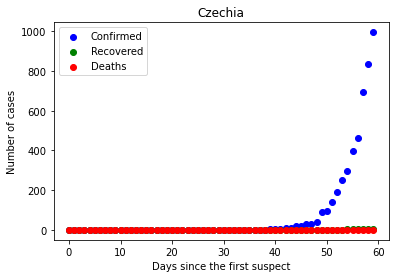

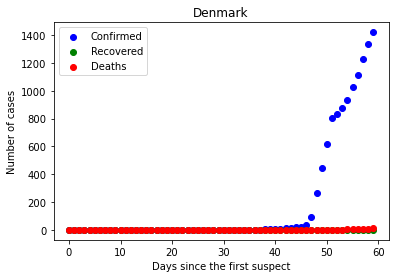

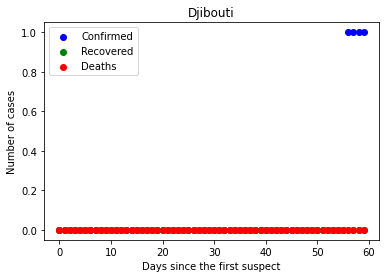

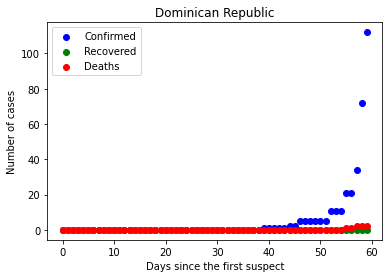

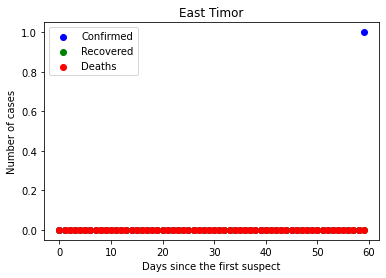

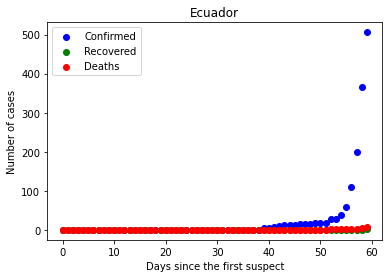

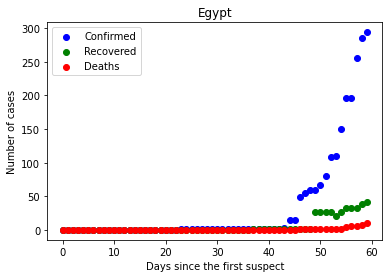

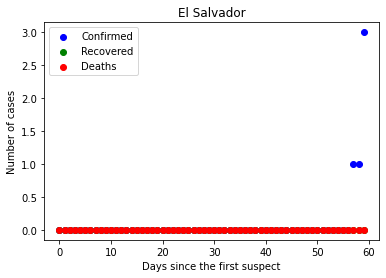

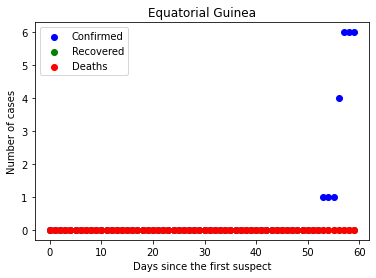

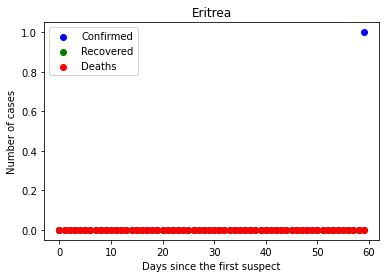

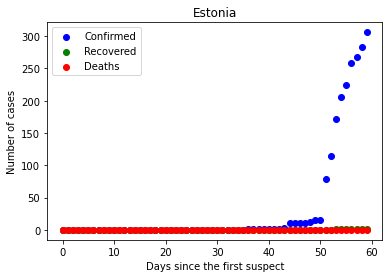

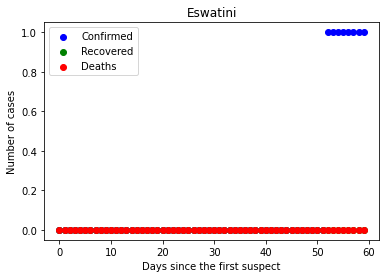

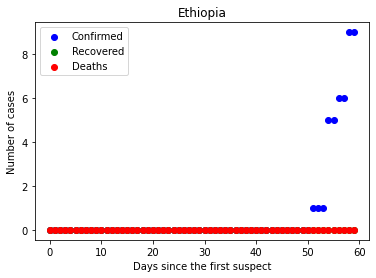

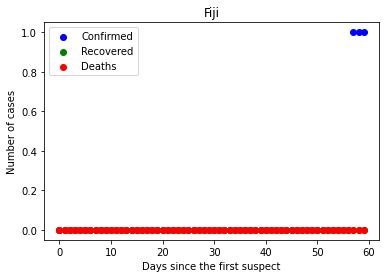

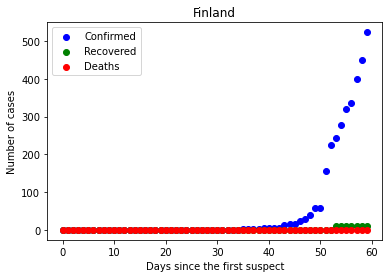

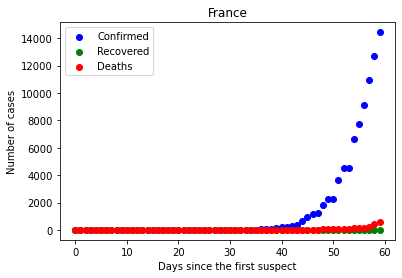

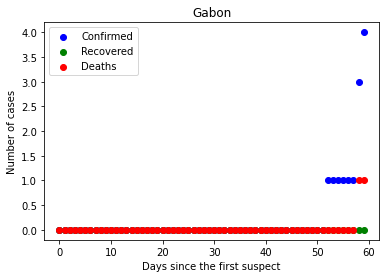

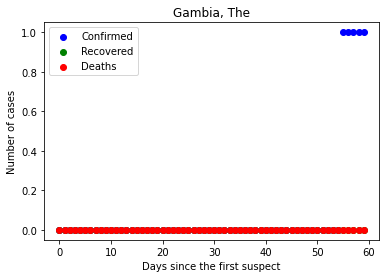

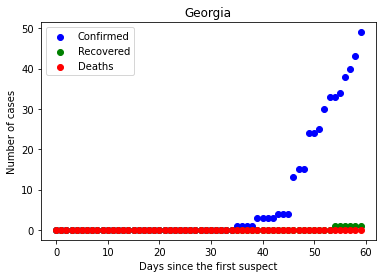

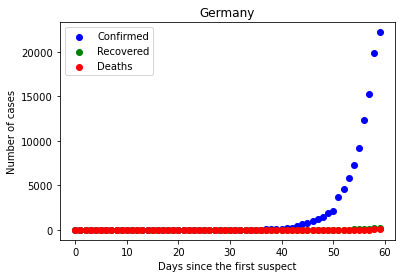

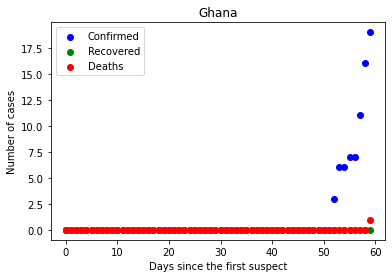

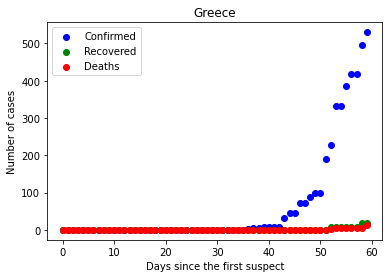

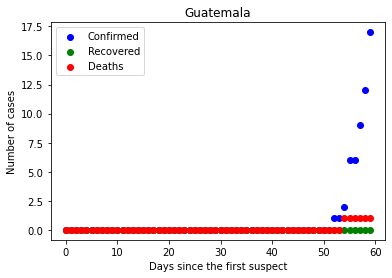

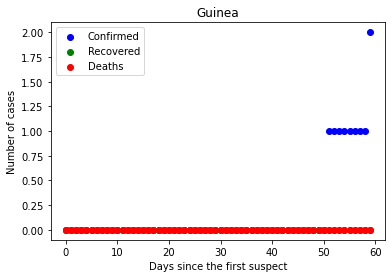

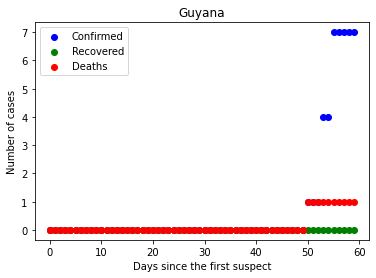

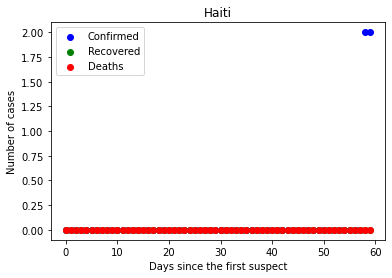

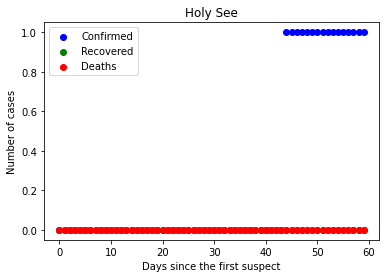

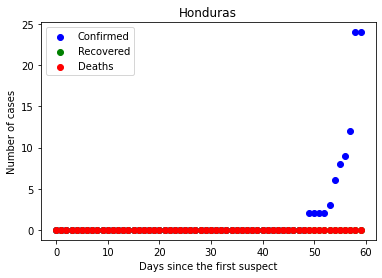

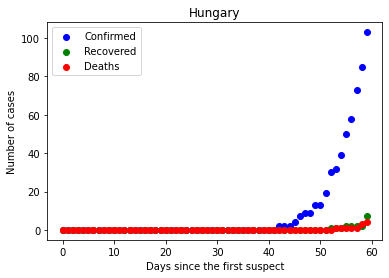

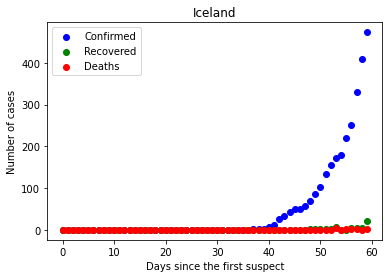

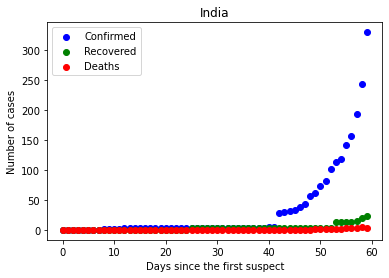

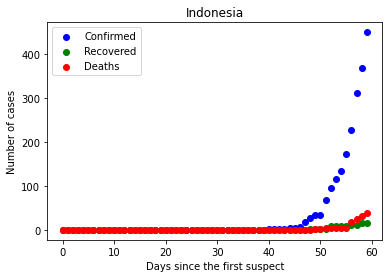

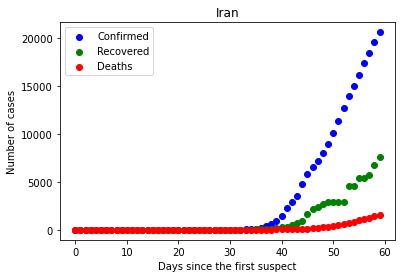

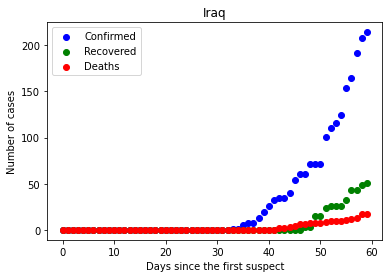

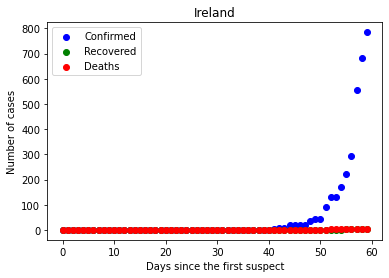

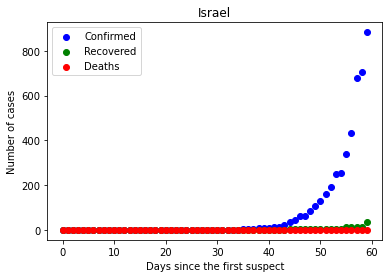

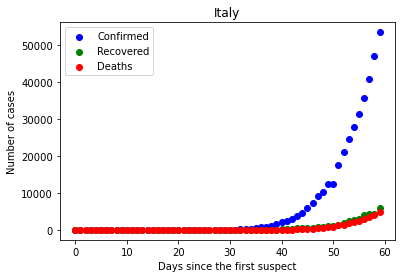

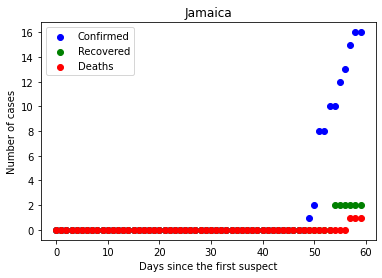

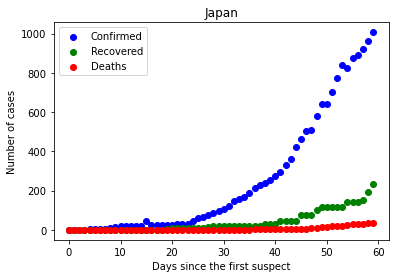

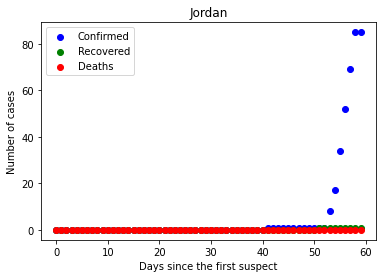

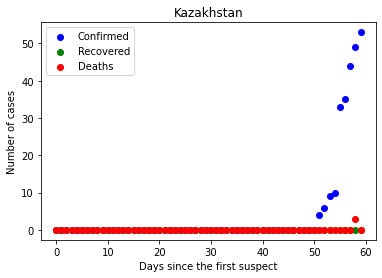

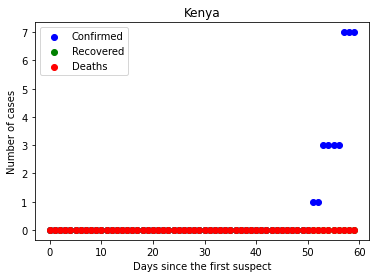

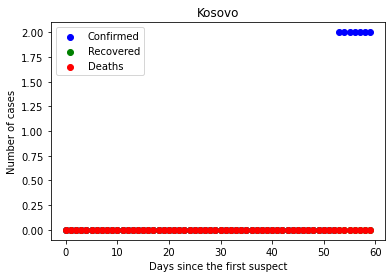

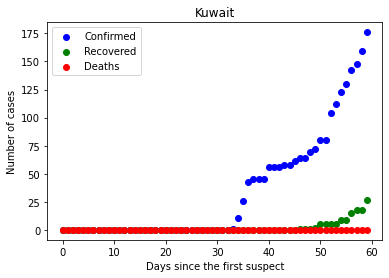

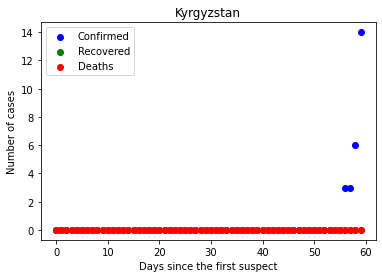

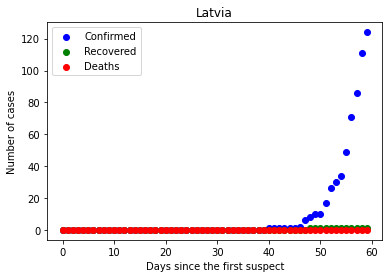

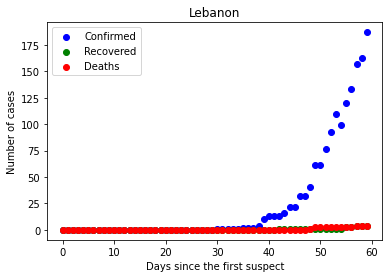

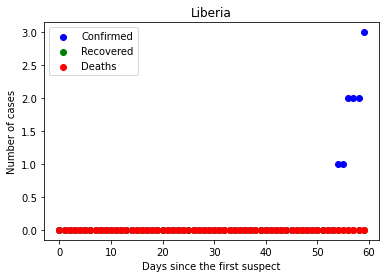

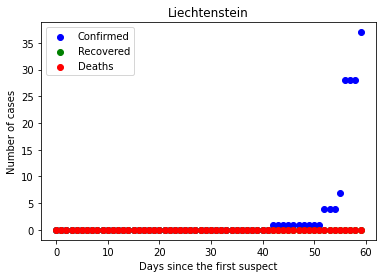

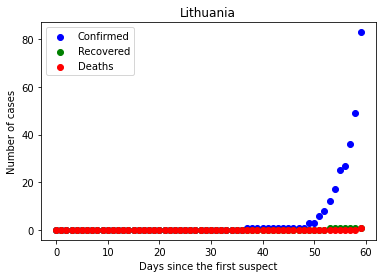

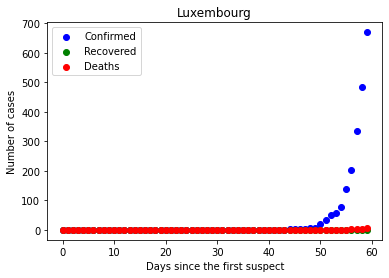

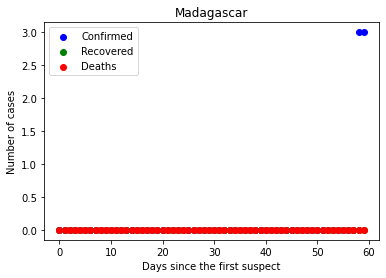

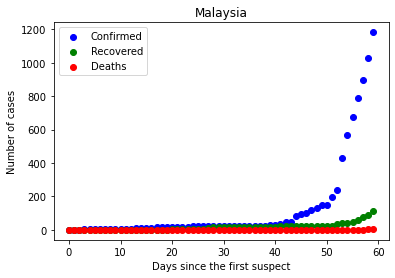

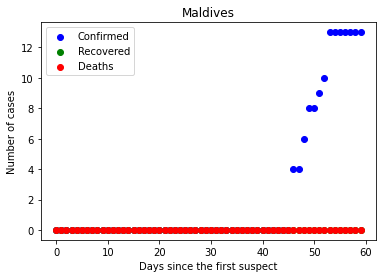

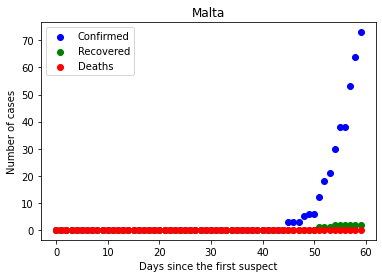

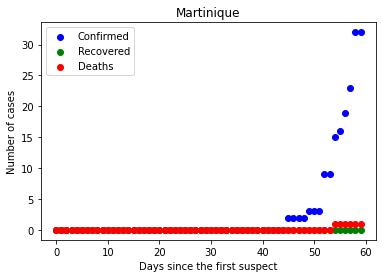

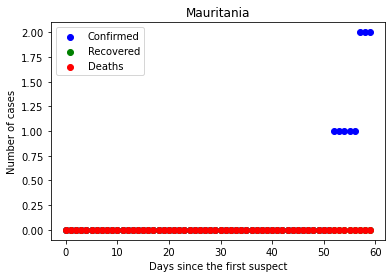

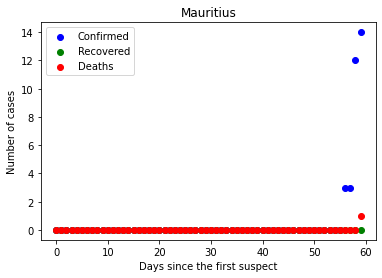

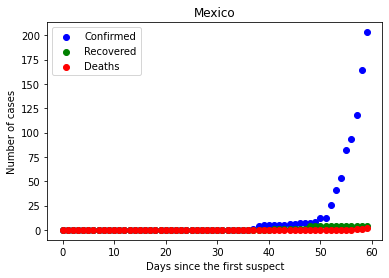

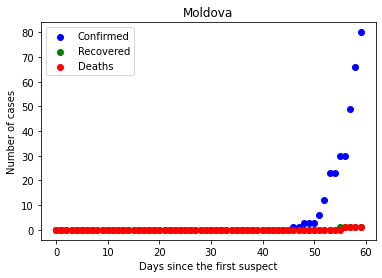

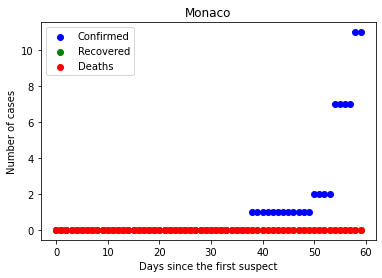

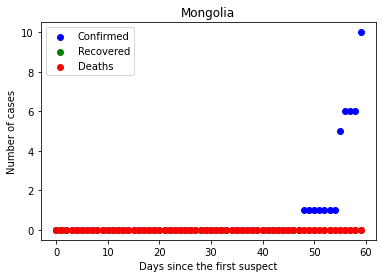

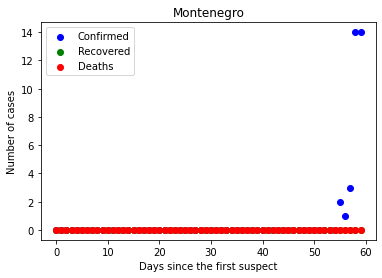

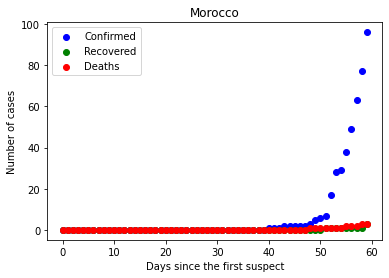

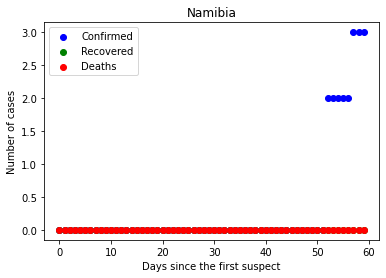

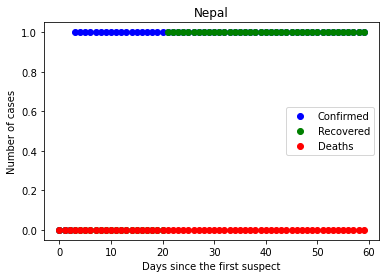

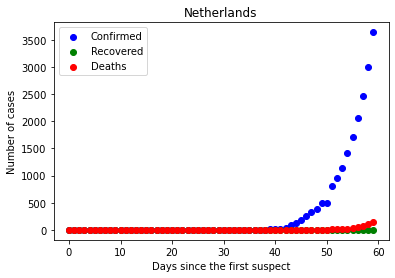

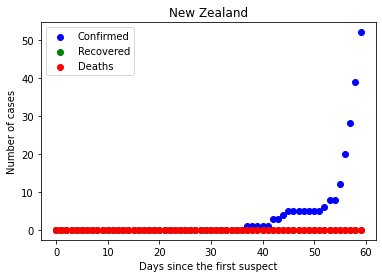

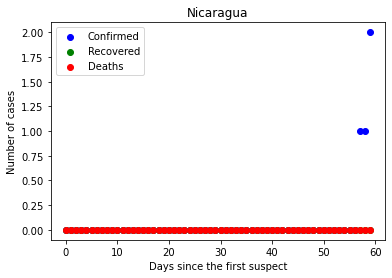

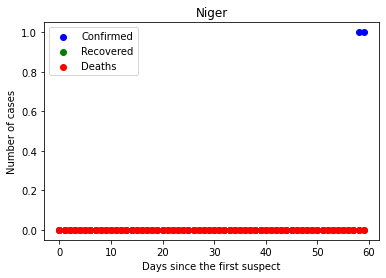

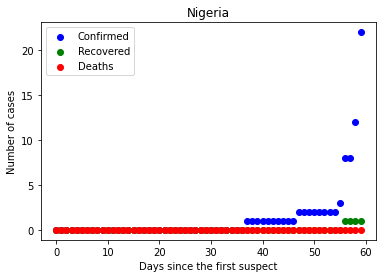

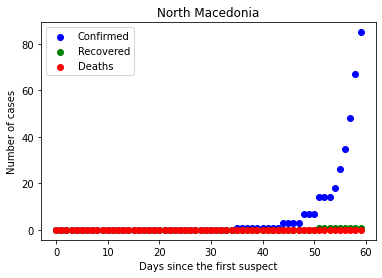

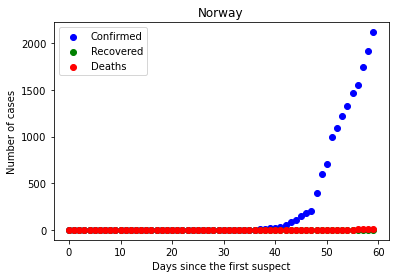

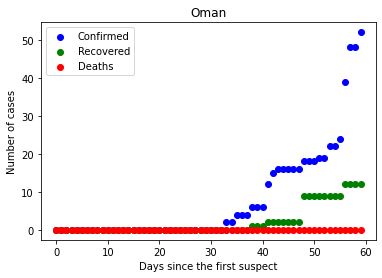

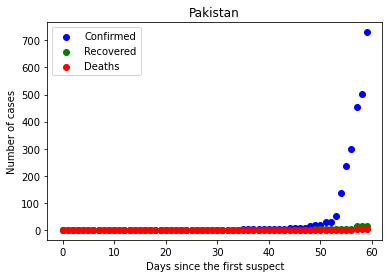

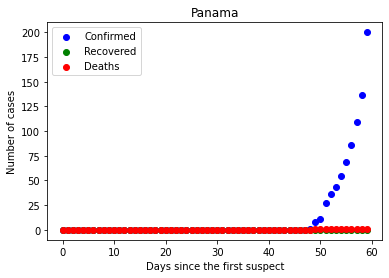

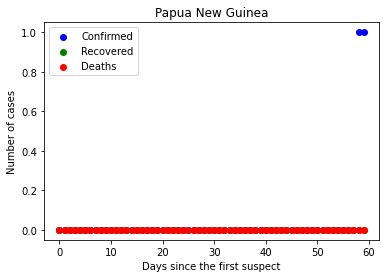

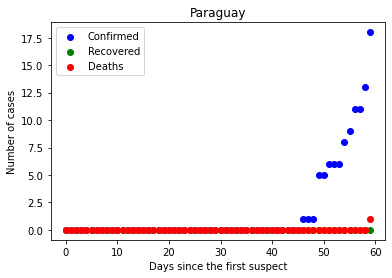

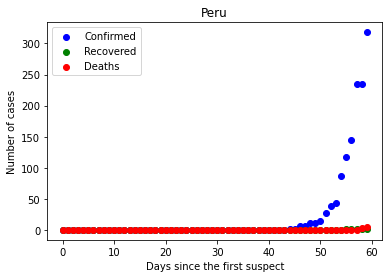

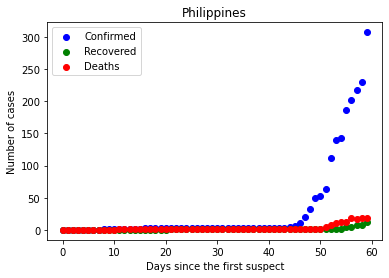

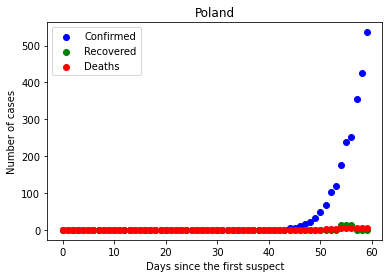

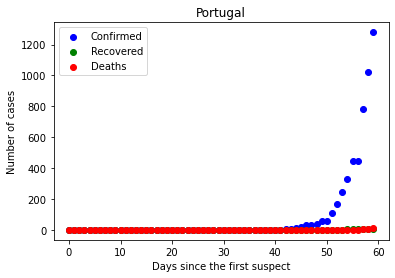

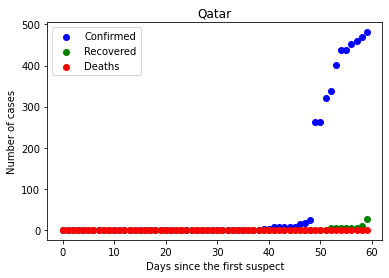

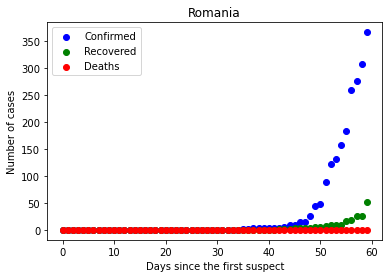

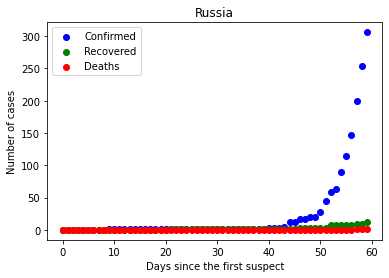

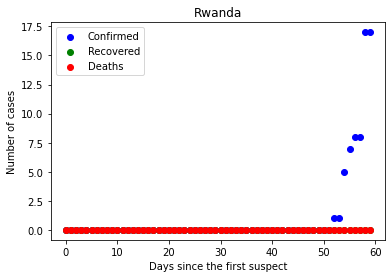

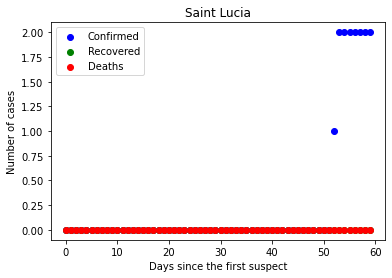

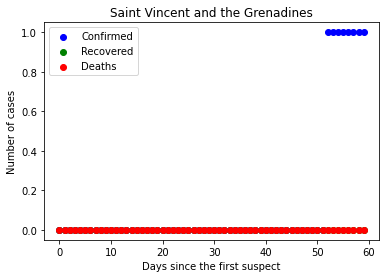

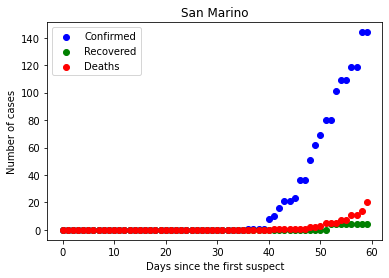

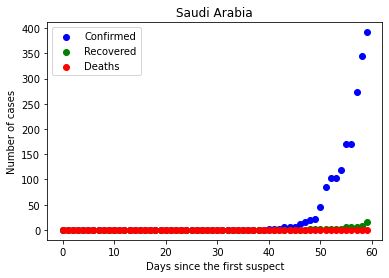

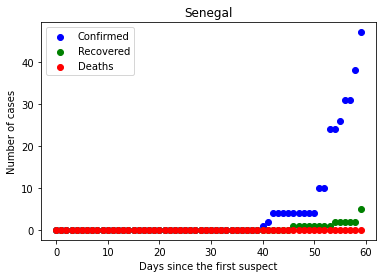

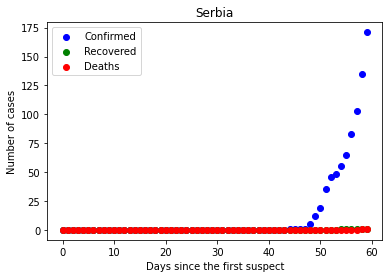

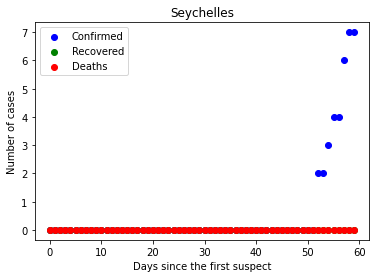

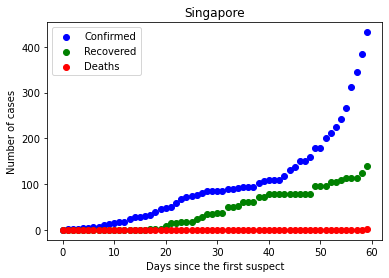

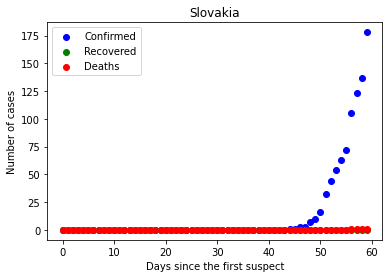

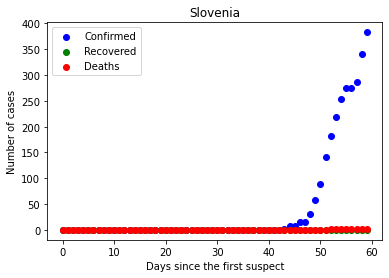

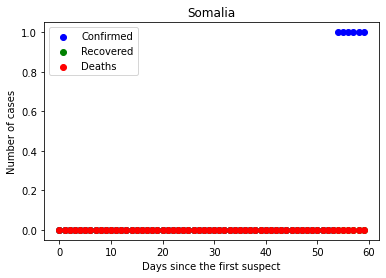

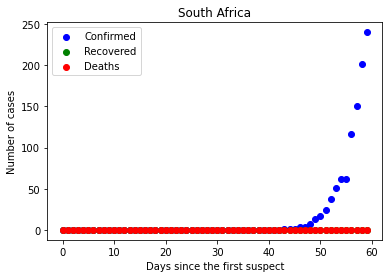

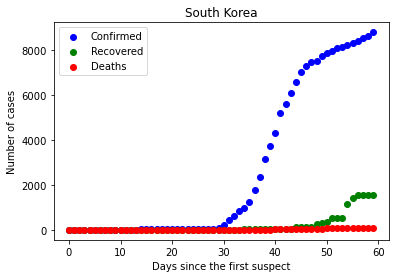

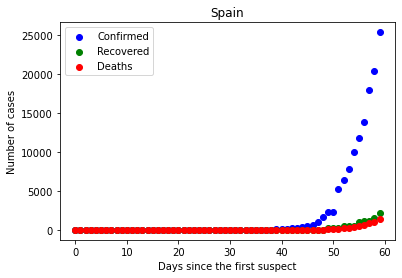

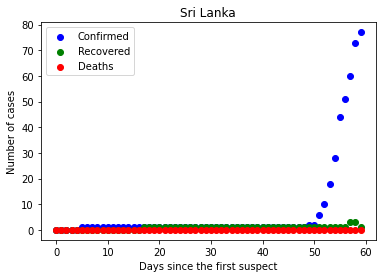

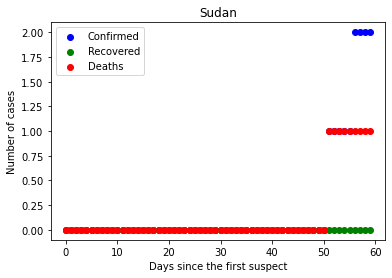

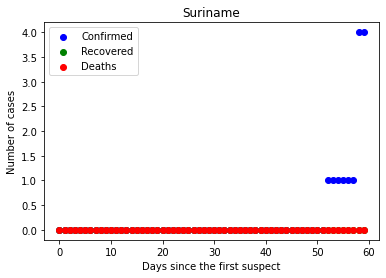

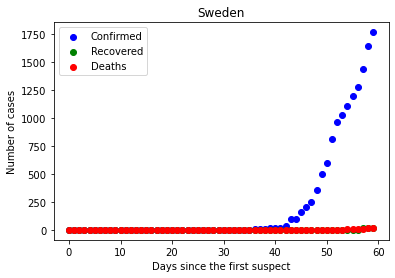

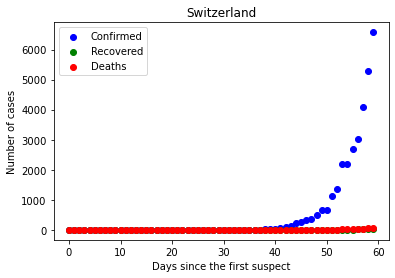

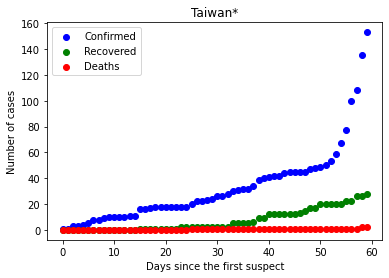

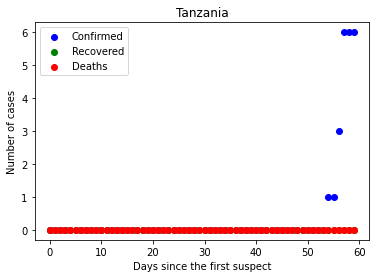

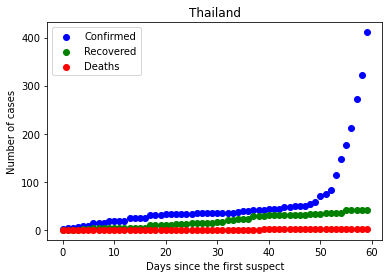

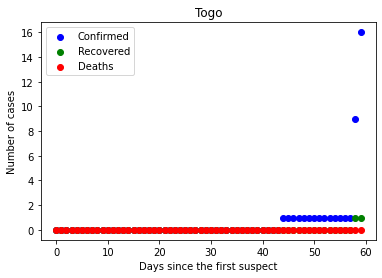

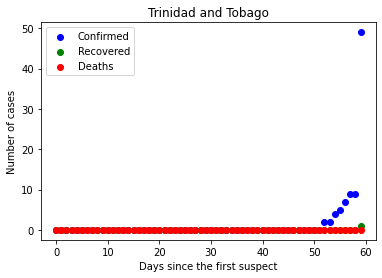

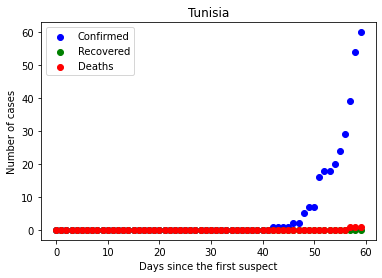

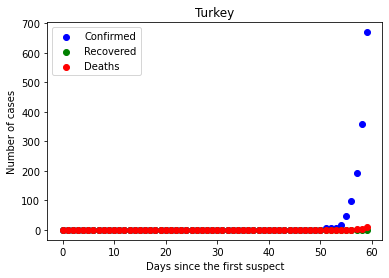

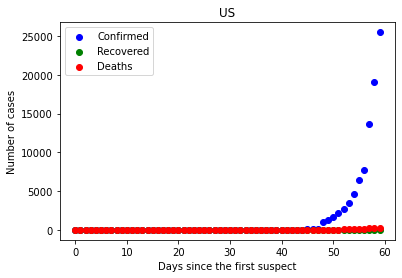

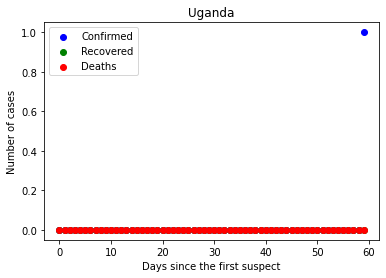

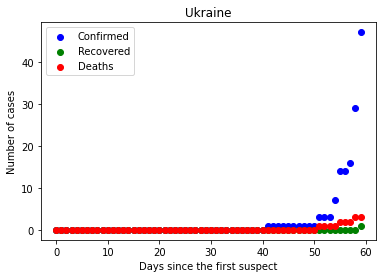

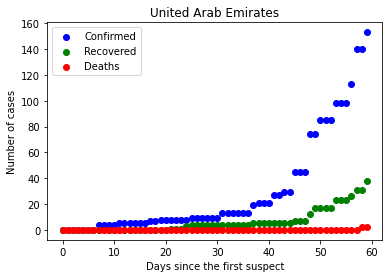

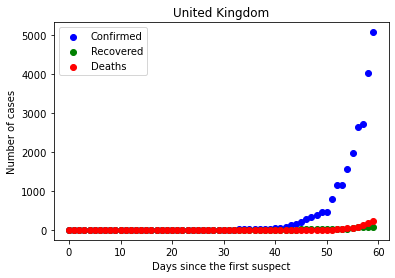

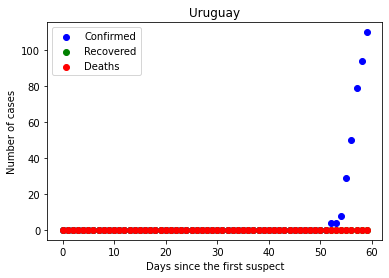

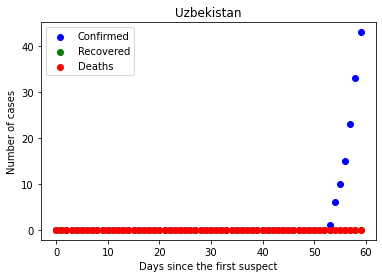

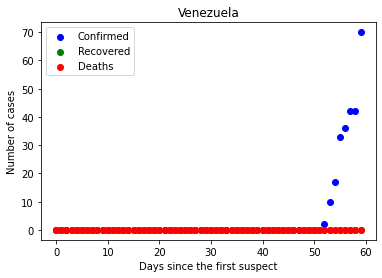

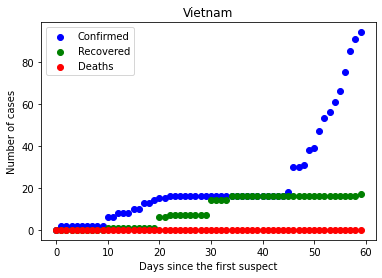

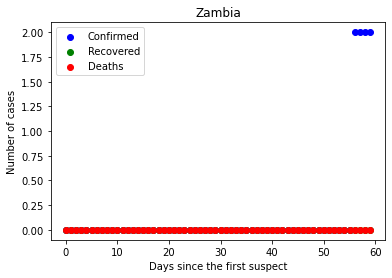

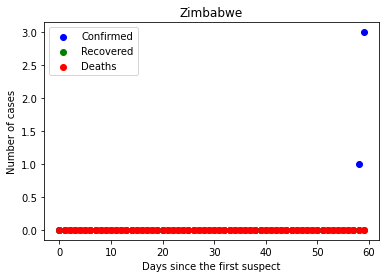

In [23]:
# what is the trend of death,recovered,confirmed as the date goes on for each country :
for idx in range (0,len(countries)):
    # this is a df that contains : one country, dates, confirmed, death, recovered:
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='Green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [25]:
# now we can make one to see how all the world is moving :
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

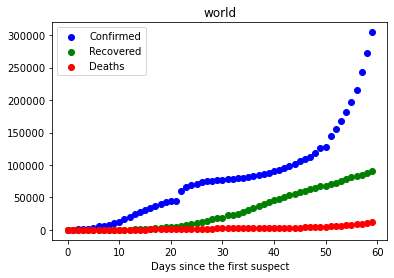

In [27]:
# now we jsut make the plot without i in range :
F = df4
plt.scatter(np.arange(0,len(F)),F['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(F)),F['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(F)),F['Deaths'],color='red',label='Deaths')
plt.title('world')
plt.xlabel('Days since the first suspect')
plt.legend()
plt.show()